In [ ]:
import MySQLdb
import pandas as pd

conn = MySQLdb.connect(
    host = '',
    user ='',
    password = '',
    database = ''
)
query = "select * from churn"
fisrst_itr = pd.read_sql(query,conn)

conn.close()

C:\Users\wajah\AppData\Local\Temp\ipykernel_35564\979868078.py:11: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  fisrst_itr = pd.read_sql(query,conn)


In [85]:
fisrst_itr

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7028,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7029,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7030,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


### cheking the null percentage

In [86]:
null_percent = fisrst_itr.isnull().sum()*100/len(fisrst_itr)
null_df = pd.DataFrame({"columns" : fisrst_itr.columns, "null_percent": null_percent})
null_df.reset_index(drop=True)

,columns,null_percent
0,customerID,0.0
1,gender,0.0
2,SeniorCitizen,0.0
3,Partner,0.0
4,Dependents,0.0
5,tenure,0.0
6,PhoneService,0.0
7,MultipleLines,0.0
8,InternetService,0.0
9,OnlineSecurity,0.0


### checking the redundancy in cols

In [87]:
identites = []

for col1 in fisrst_itr.columns:
    for col2 in fisrst_itr.columns:
        if col1!=col2 and fisrst_itr[col1].equals(fisrst_itr[col2]):
            identites.append(col1)
            print(f"{col1} and {col2} are identical you should remove them")

print(identites)

[]


### getting to know the data

In [88]:
fisrst_itr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [89]:
fisrst_itr.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [90]:
fisrst_itr.columns.to_list()

['customerID',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn']

In [91]:
unis = {}
for col in fisrst_itr.columns:
    uniques = fisrst_itr[col].nunique()
    unis[col] = uniques
   
unis_df = pd.DataFrame.from_dict(unis , orient='index', columns=['unique values'])
unis_df


,unique values
customerID,7032
gender,2
SeniorCitizen,2
Partner,2
Dependents,2
tenure,72
PhoneService,2
MultipleLines,3
InternetService,3
OnlineSecurity,3


In [92]:
fisrst_itr["month_tenure"] = pd.cut(fisrst_itr['tenure'], bins=[0,5,10,20,30,50, float('inf')], labels=["0-5", "5-10", "10-20","20-30", "30-50", "50+"], right=False)

In [93]:
fisrst_itr['month_tenure'].nunique()

6

### checking the outliers

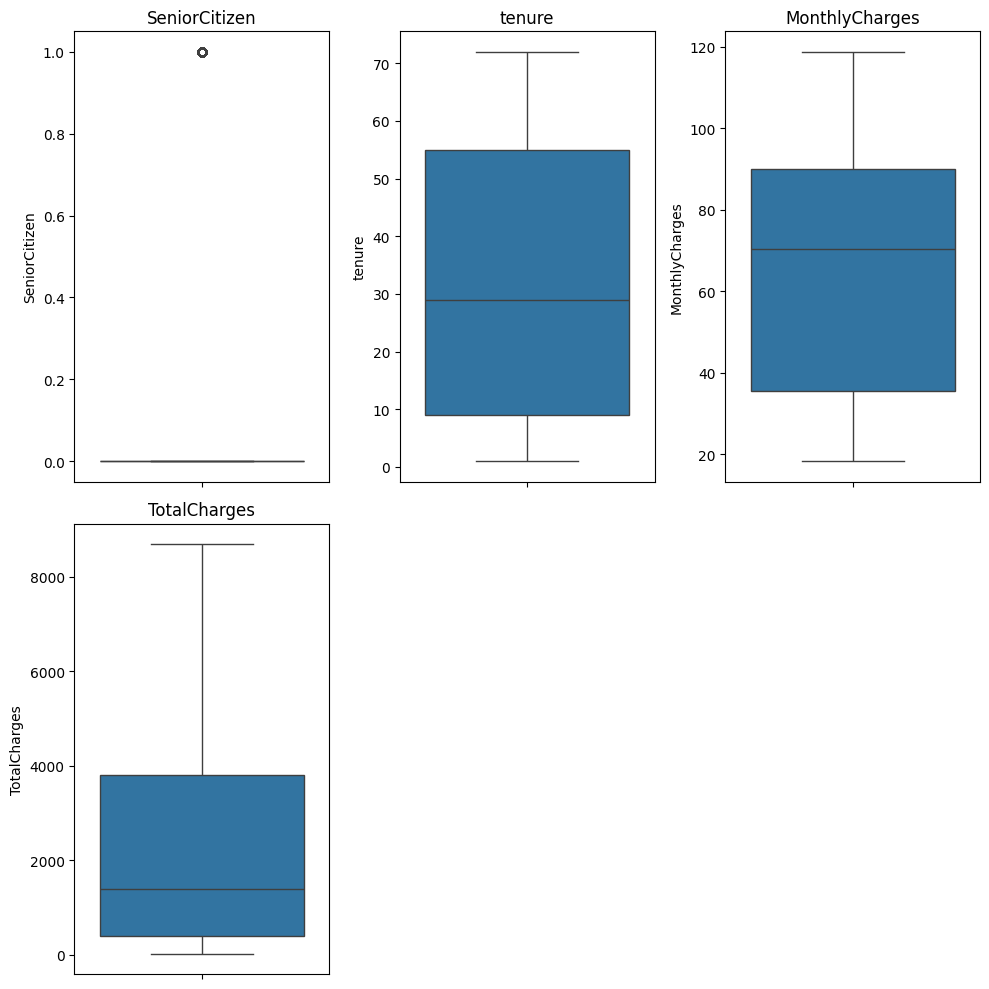

In [94]:
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns

num_features = fisrst_itr.select_dtypes(include = np.number).columns
num_cols = len(num_features)
rows = math.ceil(num_cols/3)

fig,axes = plt.subplots(rows, 3, figsize=(10,10))

if isinstance(axes, np.ndarray):
    axes = axes.flatten()
else:
    axes = [axes]

for i,col in enumerate(num_features):
    sns.boxplot(fisrst_itr[col], ax=axes[i])
    axes[i].set_title(col)

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

fig.tight_layout()
plt.show()


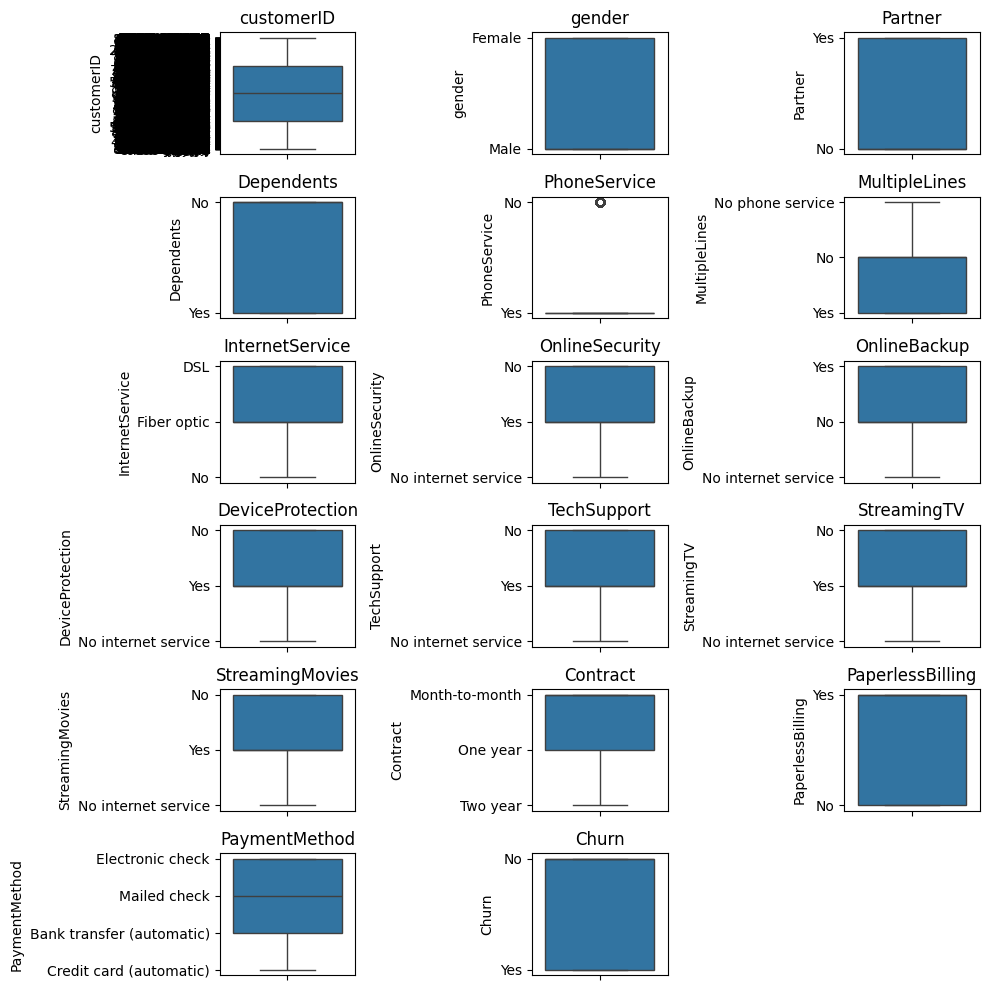

In [95]:
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns

num_features = fisrst_itr.select_dtypes(include = ['object']).columns
num_cols = len(num_features)
rows = math.ceil(num_cols/3)

fig,axes = plt.subplots(rows, 3, figsize=(10,10))

if isinstance(axes, np.ndarray):
    axes = axes.flatten()
else:
    axes = [axes]

for i,col in enumerate(num_features):
    sns.boxplot(fisrst_itr[col], ax=axes[i])
    axes[i].set_title(col)

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

fig.tight_layout()
plt.show()


### checkinge the distribution numeric

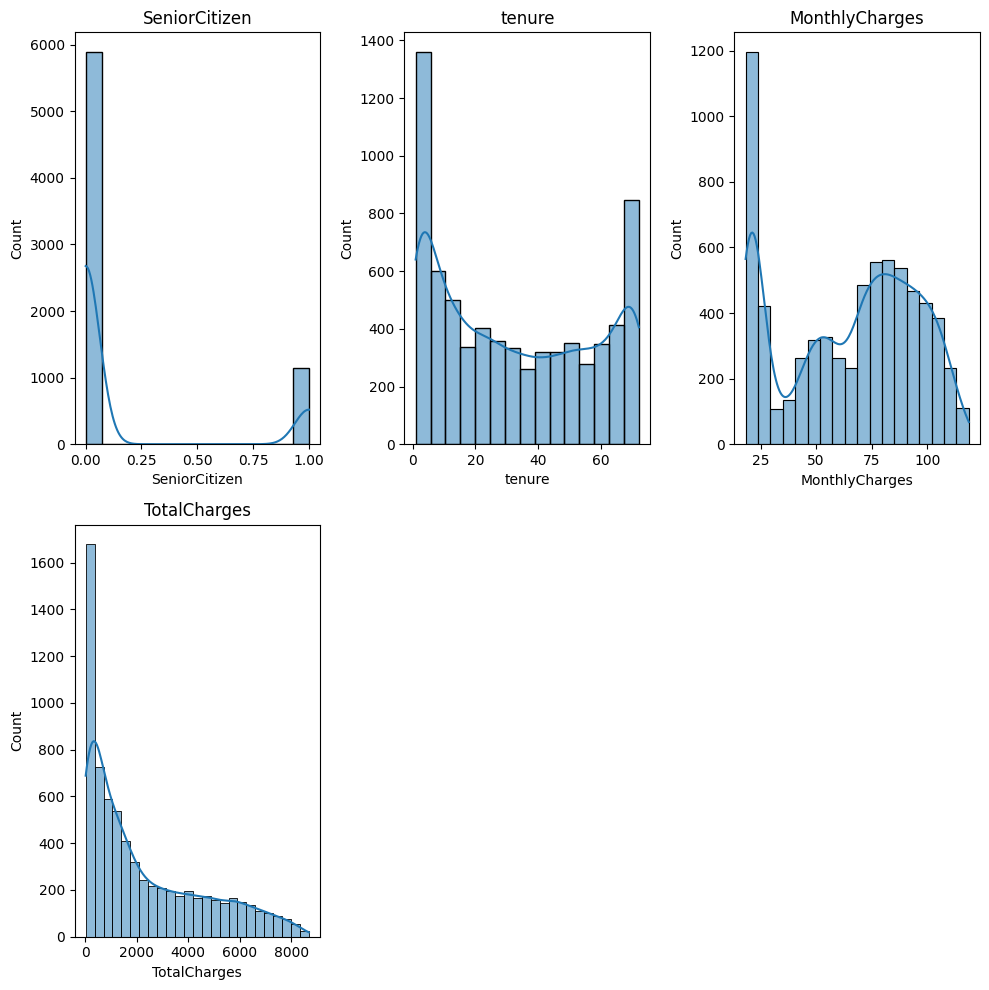

In [96]:
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns

num_features = fisrst_itr.select_dtypes(include = np.number).columns
num_cols = len(num_features)
rows = math.ceil(num_cols/3)

fig,axes = plt.subplots(rows, 3, figsize=(10,10))

if isinstance(axes, np.ndarray):
    axes = axes.flatten()
else:
    axes = [axes]

for i,col in enumerate(num_features):
    sns.histplot(fisrst_itr[col], ax=axes[i], kde=True)
    axes[i].set_title(col)

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

fig.tight_layout()
plt.show()


### checking the percentage churn

<Axes: xlabel='Churn'>

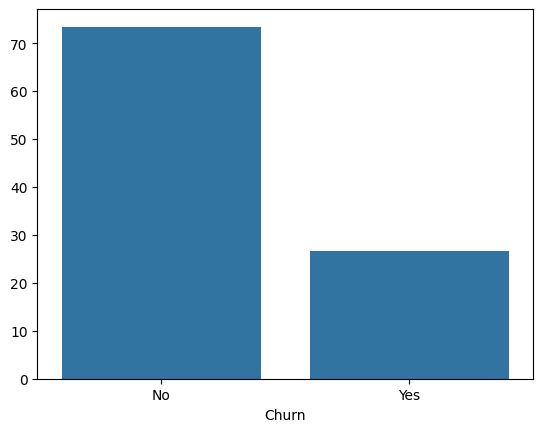

In [97]:
churn_percenatge = fisrst_itr['Churn'].value_counts(normalize = True)*100

sns.barplot(x=churn_percenatge.index, y=churn_percenatge.values)

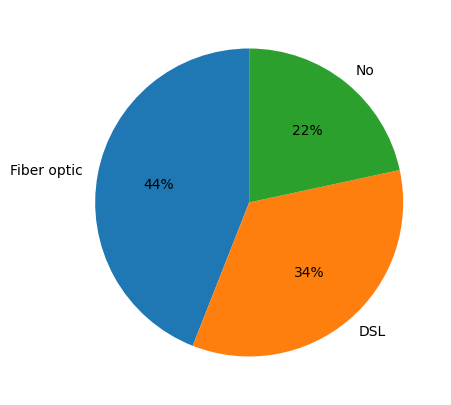

In [98]:
fig,axes = plt.subplots(figsize=(5,5))
values = fisrst_itr['InternetService'].value_counts()
plt.pie(x=values, labels=values.index, autopct='%1.0f%%', pctdistance=0.6, startangle=90)
plt.show()

<Axes: xlabel='Contract', ylabel='count'>

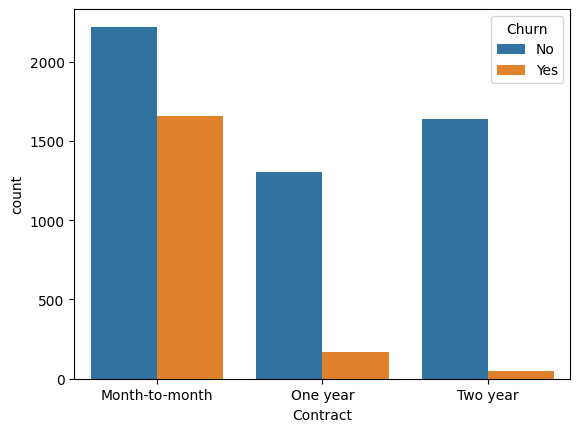

In [99]:
churn_Rate_by_contract = fisrst_itr.groupby('Contract')['Churn'].value_counts().reset_index()
churn_Rate_by_contract

sns.barplot(x='Contract',y='count', hue='Churn', data=churn_Rate_by_contract)

<Axes: xlabel='SeniorCitizen', ylabel='count'>

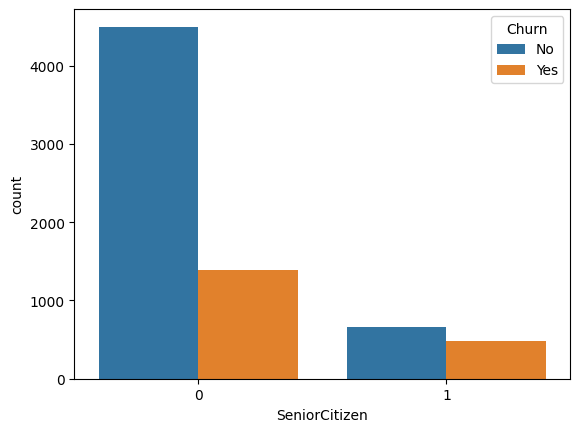

In [100]:
churn_Rate_by_seniority = fisrst_itr.groupby('SeniorCitizen')['Churn'].value_counts().reset_index()
churn_Rate_by_seniority

sns.barplot(x='SeniorCitizen',y='count', hue='Churn', data=churn_Rate_by_seniority)

<Axes: xlabel='Churn', ylabel='MonthlyCharges'>

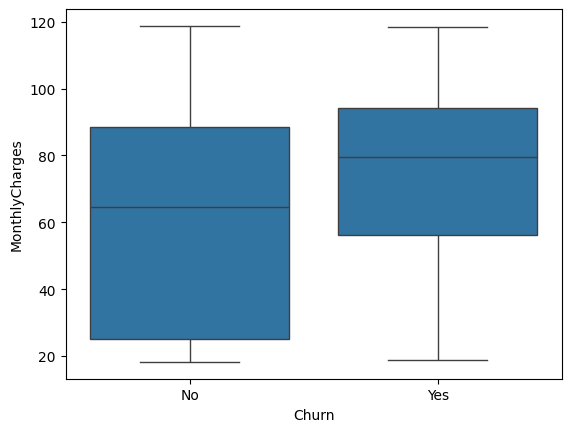

In [101]:
sns.boxplot(x='Churn', y='MonthlyCharges', data=fisrst_itr)

<Axes: xlabel='InternetService', ylabel='count'>

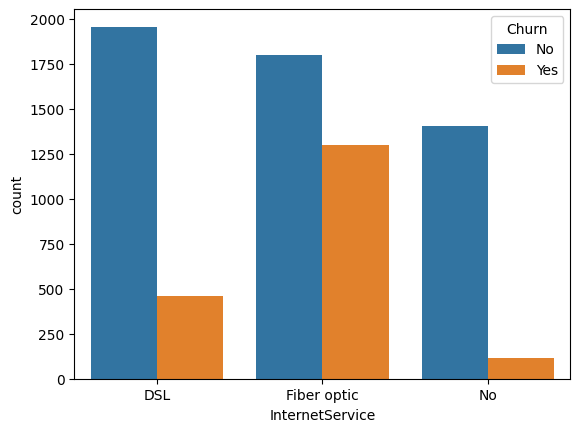

In [102]:
churn_Rate_by_service = fisrst_itr.groupby('InternetService')['Churn'].value_counts().reset_index()
churn_Rate_by_service

sns.barplot(x='InternetService',y='count', hue='Churn', data=churn_Rate_by_service)

<Axes: xlabel='tenure', ylabel='MonthlyCharges'>

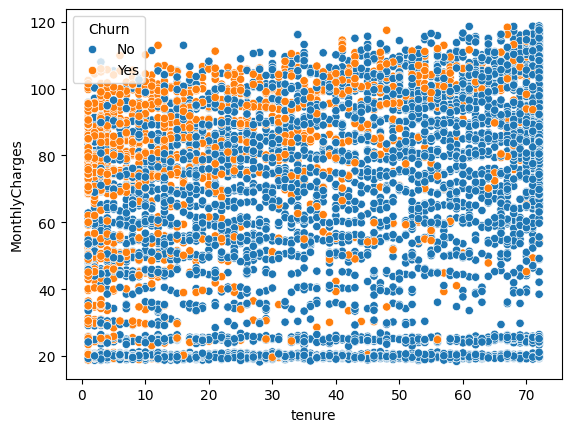

In [103]:
sns.scatterplot(x='tenure', y='MonthlyCharges',hue='Churn', data=fisrst_itr)

<Axes: xlabel='SeniorCitizen', ylabel='MonthlyCharges'>

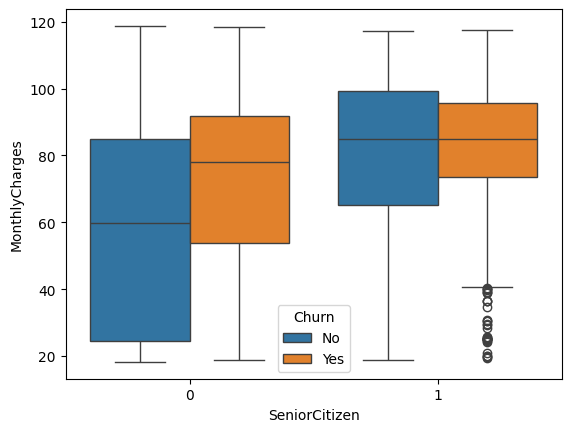

In [104]:
sns.boxplot(x='SeniorCitizen', y='MonthlyCharges', hue='Churn', data=fisrst_itr)

<Axes: xlabel='gender', ylabel='count'>

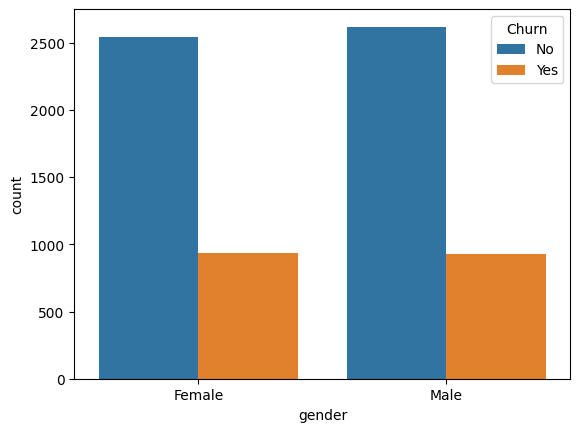

In [105]:
churn_Rate_by_gender = fisrst_itr.groupby('gender')['Churn'].value_counts().reset_index()
churn_Rate_by_gender

sns.barplot(x='gender',y='count', hue='Churn', data=churn_Rate_by_gender)

<Axes: xlabel='gender', ylabel='MonthlyCharges'>

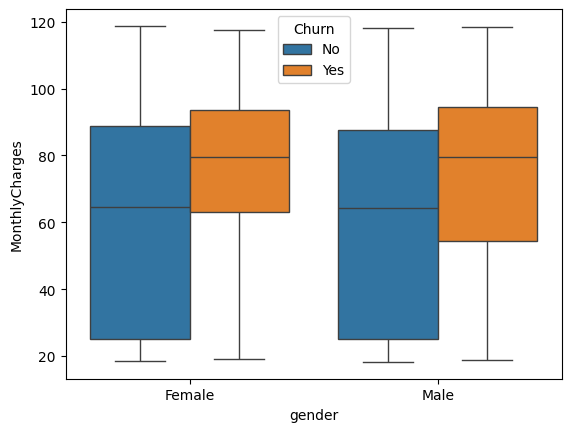

In [106]:
sns.boxplot(x='gender', y='MonthlyCharges', hue='Churn', data=fisrst_itr)

<Axes: xlabel='Contract', ylabel='churn_binaries'>

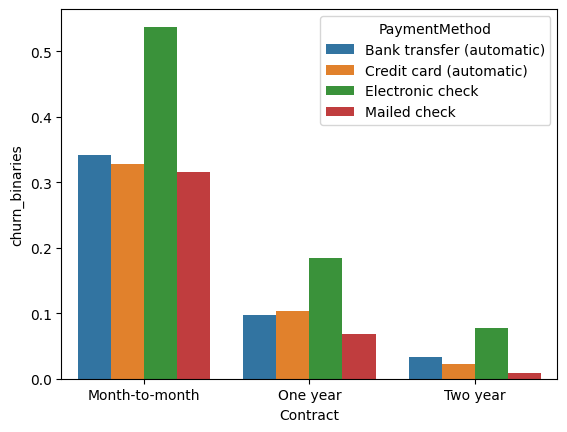

In [107]:
fisrst_itr['churn_binaries'] = fisrst_itr['Churn'].map({'Yes':1, 'No':0})
grouped_chart = fisrst_itr.groupby(['Contract', 'PaymentMethod'])['churn_binaries'].mean().reset_index()
#grouped_chart
sns.barplot(x='Contract', y='churn_binaries', hue='PaymentMethod', data=grouped_chart)

In [108]:
fisrst_itr

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,month_tenure,churn_binaries
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0-5,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,One year,No,Mailed check,56.95,1889.50,No,30-50,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,0-5,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,30-50,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,0-5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No,20-30,0
7028,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No,50+,0
7029,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,10-20,0
7030,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes,0-5,1


### checking the variance withinn columns

In [109]:
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold(threshold=0.1)
selector.fit(fisrst_itr.select_dtypes(include=np.number))
low_variance_features = fisrst_itr.select_dtypes(include=np.number).columns[~selector.get_support()]

low_variance_features

Index([], dtype='object')

### checking the  collinearity in numeric columns

In [285]:
corr_vals = fisrst_itr.select_dtypes(include=np.number).corr()
corr_vals

,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,EarlyChurnRisk,PriceSensitivity
SeniorCitizen,1.000000,0.016957,-0.210550,0.015683,0.100120,-0.210546,-0.152380,-0.156700,-0.223438,-0.129721,-0.120658,-0.141820,0.156258,0.219874,0.102411,0.150541,-0.009923,-0.002588
Partner,0.016957,1.000000,0.452269,0.381912,0.090774,0.081078,0.086346,0.093391,0.068277,0.079066,0.075310,0.294094,-0.013957,0.097825,0.319072,-0.149982,-0.274883,-0.267760
Dependents,-0.210550,0.452269,1.000000,0.163386,-0.017333,0.188889,0.160845,0.154819,0.179176,0.138809,0.125086,0.240556,-0.110131,-0.112343,0.064653,-0.163128,-0.147649,-0.133664
tenure,0.015683,0.381912,0.163386,1.000000,0.243214,0.147575,0.180896,0.180895,0.146727,0.138208,0.142143,0.676734,0.004823,0.246862,0.825880,-0.354049,-0.590831,-0.583762
MultipleLines,0.100120,0.090774,-0.017333,0.243214,1.000000,-0.235077,-0.210051,-0.200400,-0.232474,-0.202326,-0.194858,0.078254,0.108261,0.146127,0.251357,0.019609,-0.153357,-0.166865
OnlineSecurity,-0.210546,0.081078,0.188889,0.147575,-0.235077,1.000000,0.751312,0.748684,0.790951,0.701526,0.704672,0.389138,-0.333656,-0.620532,-0.153234,-0.332443,-0.120986,-0.142740
OnlineBackup,-0.152380,0.086346,0.160845,0.180896,-0.210051,0.751312,1.000000,0.740244,0.753752,0.720277,0.716388,0.350419,-0.261565,-0.537727,-0.085017,-0.291047,-0.132667,-0.159346
DeviceProtection,-0.156700,0.093391,0.154819,0.180895,-0.200400,0.748684,0.740244,1.000000,0.767659,0.762742,0.766635,0.389480,-0.275519,-0.512604,-0.077394,-0.281048,-0.144631,-0.166142
TechSupport,-0.223438,0.068277,0.179176,0.146727,-0.232474,0.790951,0.753752,0.767659,1.000000,0.737211,0.737126,0.417691,-0.310354,-0.596805,-0.141011,-0.329474,-0.118244,-0.144855
StreamingTV,-0.129721,0.079066,0.138809,0.138208,-0.202326,0.701526,0.720277,0.762742,0.737211,1.000000,0.809507,0.327109,-0.202967,-0.422060,-0.075697,-0.205246,-0.126291,-0.143961


In [ ]:
fisrst_itr['TenureBucket'] = pd.cut(fisrst_itr['tenure'], bins=[0, 6, 24, np.inf], labels=['New', 'Intermediate', 'Loyal'])

fisrst_itr['HasFamily'] = ((fisrst_itr['Dependents'] == 'Yes') | (fisrst_itr['Partner'] == 'Yes')).astype(int)

fisrst_itr['EarlyChurnRisk'] = ((fisrst_itr['tenure'] < 6) & (fisrst_itr['Contract'] == 'Month-to-month')).astype(int)

fisrst_itr['PriceSensitivity'] = fisrst_itr['MonthlyCharges'] / (fisrst_itr['AvgMonthlySpend'] + 1)  # Avoid division by zero

fisrst_itr["Contract"] = fisrst_itr["Contract"].map({'Month-to-month': 0,'One year':1, 'Two year':2 })

fisrst_itr['Has_Complete_Internet_Security'] = (
    (fisrst_itr['InternetService'] == 'Fiber optic') & 
    (fisrst_itr['OnlineSecurity'] == 'Yes') & 
    (fisrst_itr['TechSupport'] == 'Yes')
).astype(int)



In [286]:
threshold = 0.85
corr_feats = []
for i in range(len(corr_vals.columns)):
    for j in range(i):
        if abs(corr_vals.iloc[i,j])>threshold:
            corr_feats.append((corr_vals.columns[i], corr_vals.columns[j], corr_vals.iloc[i,j]))
if corr_feats:
    print(f"the values with corr above thrsehold {threshold} are: ")
    for col1,col2,value in corr_feats:
        print(f"{col1} and {col2} with correlation {value}")
else:
    print("No correlation found above the threshold")


No correlation found above the threshold


In [188]:
fisrst_itr.columns.to_list()

['customerID',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn',
 'month_tenure',
 'churn_binaries',
 'TenureBucket',
 'HasFamily',
 'EarlyChurnRisk',
 'PriceSensitivity']

In [246]:
fisrst_itr

,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,PaymentMethod,MonthlyCharges,TotalCharges,Churn,month_tenure,churn_binaries,TenureBucket,HasFamily,EarlyChurnRisk,PriceSensitivity
0,0,1,0,1,No phone service,DSL,0,1,0,0,...,Electronic check,29.85,29.85,No,0-5,0,New,1,1,1.874411
1,0,0,0,34,No,DSL,1,0,1,0,...,Mailed check,56.95,1889.50,No,30-50,0,Loyal,0,0,1.035724
2,0,0,0,2,No,DSL,1,1,0,0,...,Mailed check,53.85,108.15,Yes,0-5,1,New,0,1,1.453441
3,0,0,0,45,No phone service,DSL,1,0,1,1,...,Bank transfer (automatic),42.30,1840.75,No,30-50,0,Loyal,0,0,1.031297
4,0,0,0,2,No,Fiber optic,0,0,0,0,...,Electronic check,70.70,151.65,Yes,0-5,1,New,0,1,1.371484
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0,1,1,24,Yes,DSL,1,0,1,1,...,Mailed check,84.80,1990.50,No,20-30,0,Intermediate,1,0,1.051848
7028,0,1,1,72,Yes,Fiber optic,0,1,1,0,...,Credit card (automatic),103.20,7362.90,No,50+,0,Loyal,1,0,1.013139
7029,0,1,1,11,No phone service,DSL,1,0,0,0,...,Electronic check,29.60,346.45,No,10-20,0,Intermediate,1,0,0.990933
7030,1,1,0,4,Yes,Fiber optic,0,0,0,0,...,Mailed check,74.40,306.60,Yes,0-5,1,New,1,1,1.193838


In [237]:
fisrst_itr.columns.to_list()

['SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn',
 'month_tenure',
 'churn_binaries',
 'TenureBucket',
 'HasFamily',
 'EarlyChurnRisk',
 'PriceSensitivity']

In [241]:
yes_no_col = ['Partner', 'Dependents','PaperlessBilling']

for col in yes_no_col:
    fisrst_itr[col] = fisrst_itr[col].map({'No':0, 'Yes':1})


In [270]:
fisrst_itr['Churn'] = fisrst_itr['Churn'].map({'No':0, 'Yes':1})

In [272]:
fisrst_itr.drop('churn_binaries', axis=1, inplace=True)

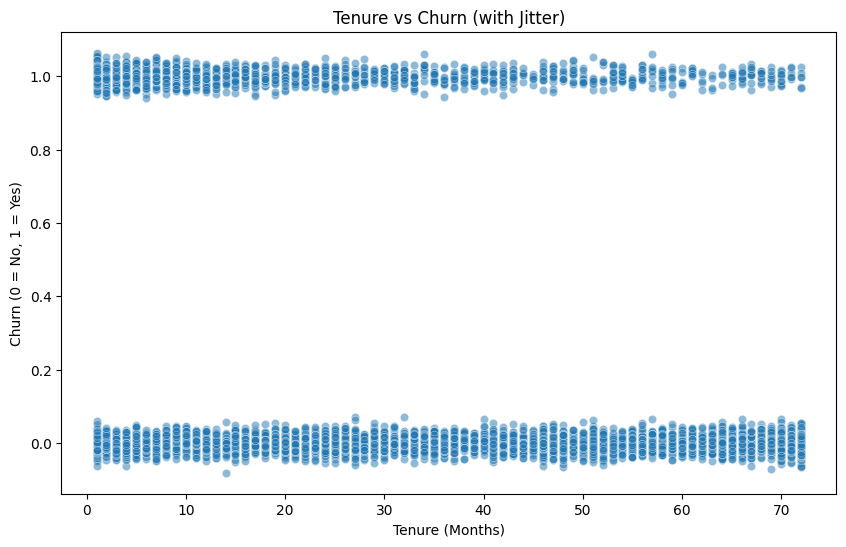

In [ ]:
jittered_churn = fisrst_itr['churn_binaries'] + np.random.normal(0, 0.02, len(fisrst_itr))

plt.figure(figsize=(10,6))
sns.scatterplot(x=fisrst_itr['tenure'], y=jittered_churn, alpha=0.5)
plt.xlabel('Tenure (Months)')
plt.ylabel('Churn (0 = No, 1 = Yes)')
plt.title('Tenure vs Churn (with Jitter)')
plt.show()


In [262]:
fisrst_itr.drop('month_tenure', axis=1, inplace=True)

In [282]:
fisrst_itr.drop('HasFamily',axis=1, inplace=True)

In [274]:
col_unis = {}
cat_cols = fisrst_itr.select_dtypes(exclude=np.number)
for col in cat_cols.columns:
    uniques = fisrst_itr[col].nunique()
    col_unis[col] = uniques
uniques_df = pd.DataFrame.from_dict(col_unis, orient='index')

uniques_df

,0
InternetService,3
PaymentMethod,4
TenureBucket,3


In [275]:
fisrst_itr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   SeniorCitizen     7032 non-null   int64   
 1   Partner           7032 non-null   int64   
 2   Dependents        7032 non-null   int64   
 3   tenure            7032 non-null   int64   
 4   MultipleLines     7032 non-null   int64   
 5   InternetService   7032 non-null   object  
 6   OnlineSecurity    7032 non-null   int64   
 7   OnlineBackup      7032 non-null   int64   
 8   DeviceProtection  7032 non-null   int64   
 9   TechSupport       7032 non-null   int64   
 10  StreamingTV       7032 non-null   int64   
 11  StreamingMovies   7032 non-null   int64   
 12  Contract          7032 non-null   int64   
 13  PaperlessBilling  7032 non-null   int64   
 14  PaymentMethod     7032 non-null   object  
 15  MonthlyCharges    7032 non-null   float64 
 16  TotalCharges      7032 n

In [ ]:
three_way_cols = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport','StreamingTV', 'StreamingMovies']
for col in three_way_cols:
    fisrst_itr[col] = fisrst_itr[col].map({'No':0, 'Yes':1, 'No internet service':2 })

fisrst_itr['MultipleLines'] = fisrst_itr['MultipleLines'].map({'No':0, 'Yes':1, 'No phone service':2 })


<Axes: >

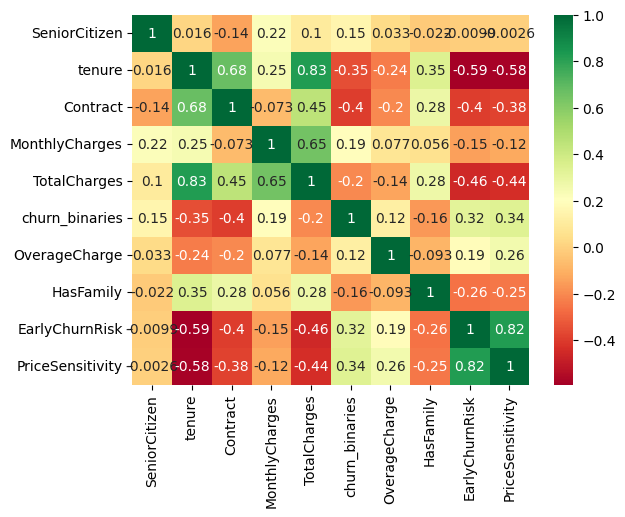

In [190]:
sns.heatmap(corr_vals,annot=True, cmap='RdYlGn')

In [297]:
from sklearn.feature_selection import mutual_info_regression
num_features = fisrst_itr.select_dtypes(include=np.number).drop('Churn',axis=1)

target = fisrst_itr['Churn']
mi_Scores = mutual_info_regression(num_features, target)

mi_df = pd.DataFrame({'features': num_features.columns, 'mi_scores': mi_Scores})

mi_df.sort_values(by='mi_scores', ascending=False)

,features,mi_scores
8,Contract,0.094839
12,PriceSensitivity,0.079198
1,tenure,0.078317
5,TechSupport,0.071353
9,MonthlyCharges,0.053931
3,OnlineBackup,0.052064
2,OnlineSecurity,0.051511
4,DeviceProtection,0.049218
6,StreamingTV,0.043147
10,TotalCharges,0.041686


In [ ]:
fisrst_itr.drop(['PaperlessBilling', 'SeniorCitizen', 'MultipleLines', 'Dependents'], axis=1, inplace=True)

In [299]:
from scipy.stats import f_oneway

anova_results = []

cat_features = fisrst_itr.select_dtypes(exclude=np.number)

for feature in cat_features:
    groups = [fisrst_itr['Churn'][fisrst_itr[feature] == val] for val in fisrst_itr[feature].unique()]
    fvalue, pvalue = f_oneway(*groups)
    anova_results.append({"Feature": feature, "F-value": round(fvalue, 2), "p-value": round(pvalue, 4)})

anova_df = pd.DataFrame(anova_results)

print(anova_df)

           Feature  F-value  p-value
0  InternetService   406.29      0.0
1    PaymentMethod   236.75      0.0
2     TenureBucket   496.78      0.0


In [ ]:
fisrst_itr.drop(columns=['customerID', 'gender', 'PhoneService', 'Has_Complete_Internet_Security'], inplace=True)


In [ ]:
cat_features = fisrst_itr.select_dtypes(exclude=np.number)
dictti = {}
for col in cat_features:
    unila = fisrst_itr[col].unique()
    dictti[col] = unila

print(dictti)

{'InternetService': array(['DSL', 'Fiber optic', 'No'], dtype=object), 'PaymentMethod': array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object), 'TenureBucket': ['New', 'Loyal', 'Intermediate']
Categories (3, object): ['New' < 'Intermediate' < 'Loyal']}


In [302]:
from sklearn.preprocessing import OneHotEncoder

cat_columns = ['InternetService','PaymentMethod','TenureBucket']
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
encoder_transformed = encoder.fit_transform(fisrst_itr[cat_columns])
encoded_df = pd.DataFrame(encoder_transformed, columns = encoder.get_feature_names_out(cat_columns))
encoded_df.index = encoded_df.index

encoded_df

,InternetService_DSL,InternetService_Fiber optic,InternetService_No,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,TenureBucket_Intermediate,TenureBucket_Loyal,TenureBucket_New
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
7027,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
7028,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
7029,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
7030,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [303]:
fisrst_itr.drop(columns=cat_columns, axis=1, inplace=True)

final_df = pd.concat([fisrst_itr, encoded_df], axis=1)

final_df.columns.to_list()

['Partner',
 'tenure',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'MonthlyCharges',
 'TotalCharges',
 'Churn',
 'EarlyChurnRisk',
 'PriceSensitivity',
 'InternetService_DSL',
 'InternetService_Fiber optic',
 'InternetService_No',
 'PaymentMethod_Bank transfer (automatic)',
 'PaymentMethod_Credit card (automatic)',
 'PaymentMethod_Electronic check',
 'PaymentMethod_Mailed check',
 'TenureBucket_Intermediate',
 'TenureBucket_Loyal',
 'TenureBucket_New']

In [304]:
final_df

,Partner,tenure,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,TenureBucket_Intermediate,TenureBucket_Loyal,TenureBucket_New
0,1,1,0,1,0,0,0,0,0,29.85,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0,34,1,0,1,0,0,0,1,56.95,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0,2,1,1,0,0,0,0,0,53.85,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0,45,1,0,1,1,0,0,1,42.30,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0,2,0,0,0,0,0,0,0,70.70,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,1,24,1,0,1,1,1,1,1,84.80,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
7028,1,72,0,1,1,0,1,1,1,103.20,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
7029,1,11,1,0,0,0,0,0,0,29.60,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
7030,1,4,0,0,0,0,0,0,0,74.40,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [ ]:
from sklearn.ensemble import RandomForestClassifier

without_target = final_df.drop('Churn', axis=1)
the_target = final_df[['Churn']]

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(without_target, the_target)

model_impportance = pd.Series(rf_model.feature_importances_, index=without_target.columns)


c:\Users\wajah\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Partner                                    0.023188
tenure                                     0.113923
OnlineSecurity                             0.042973
OnlineBackup                               0.023591
DeviceProtection                           0.021307
TechSupport                                0.040619
StreamingTV                                0.018678
StreamingMovies                            0.018043
Contract                                   0.063035
MonthlyCharges                             0.158737
TotalCharges                               0.155691
EarlyChurnRisk                             0.012275
PriceSensitivity                           0.177015
InternetService_DSL                        0.009967
InternetService_Fiber optic                0.028009
InternetService_No                         0.002516
PaymentMethod_Bank transfer (automatic)    0.011113
PaymentMethod_Credit card (automatic)      0.011494
PaymentMethod_Electronic check             0.023336
PaymentMetho

In [316]:
import warnings
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, HistGradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

warnings.filterwarnings("ignore")

x= final_df.drop('Churn', axis=1)
y = final_df['Churn']
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.2, random_state=42)

performance_df = pd.DataFrame(columns=['Accuracy', 'Precision', 'Recall', 'F1_Score'])

models = {
    'LogisticRegression': LogisticRegression(),
    'SupportVectorClassifier': SVC(),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'RandomForestClassifier': RandomForestClassifier(),
    'GradientBoostingClassifier': GradientBoostingClassifier(),
    'AdaBoostClassifier': AdaBoostClassifier(),
    'HistGradientBoostingClassifier': HistGradientBoostingClassifier(),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'GaussianNB': GaussianNB(),
    'XGBClassifier': XGBClassifier()
}

for name,model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)


    Accuracy = accuracy_score(y_test, y_pred)
    Precision = precision_score(y_test, y_pred, average='weighted')
    Recall = recall_score(y_test, y_pred, average='weighted')
    F1_Score = f1_score(y_test, y_pred, average='weighted')

    performance_df.loc[name] = [Accuracy, Precision, Recall, F1_Score]
    
performance_df = performance_df.sort_values(by='Accuracy', ascending=False)
print("\nModel Performance Comparison:")
print(performance_df)


Model Performance Comparison:
                                Accuracy  Precision    Recall  F1_Score
GradientBoostingClassifier      0.796020   0.784220  0.796020  0.785666
HistGradientBoostingClassifier  0.791756   0.781588  0.791756  0.784295
AdaBoostClassifier              0.789623   0.782075  0.789623  0.784799
XGBClassifier                   0.784648   0.772975  0.784648  0.775899
RandomForestClassifier          0.776830   0.764510  0.776830  0.767899
LogisticRegression              0.775409   0.760861  0.775409  0.763861
KNeighborsClassifier            0.767591   0.753165  0.767591  0.756992
GaussianNB                      0.742715   0.791647  0.742715  0.755390
SupportVectorClassifier         0.734186   0.539029  0.734186  0.621651
DecisionTreeClassifier          0.724947   0.725652  0.724947  0.725296


In [317]:
from sklearn.model_selection import GridSearchCV

params_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0]
}

params_grid_gb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

params_grid_ada = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.05, 0.1, 0.5, 1.0]
}

params_grid_hgb = {
    'max_iter': [50, 100, 200], 
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}
xgb_cls =  XGBClassifier()
grid_search_cls1 = GridSearchCV(xgb_cls,params_grid_xgb, scoring='accuracy', cv=5, n_jobs=-1, verbose=3)
grid_search_cls1.fit(x_train, y_train)

print("best parameter is ", grid_search_cls1.best_params_)
print("best accuracy is ", grid_search_cls1.best_score_)

grdbs_cls =  GradientBoostingClassifier()
grid_search_cls2 = GridSearchCV(grdbs_cls, params_grid_gb, scoring='accuracy', cv=5, n_jobs=-1, verbose=3)
grid_search_cls2.fit(x_train, y_train)

print("\nbest parameter is ", grid_search_cls2.best_params_)
print("best accuracy is ", grid_search_cls2.best_score_)

adab_cls =  AdaBoostClassifier()
grid_search_cls3 = GridSearchCV(adab_cls,params_grid_ada, scoring='accuracy', cv=5, n_jobs=-1, verbose=3)
grid_search_cls3.fit(x_train, y_train)

print("\nbest parameter is ", grid_search_cls3.best_params_)
print("best accuracy is ", grid_search_cls3.best_score_)

histg_cls =  HistGradientBoostingClassifier()
grid_search_cls4 = GridSearchCV(histg_cls,params_grid_hgb, scoring='accuracy', cv=5, n_jobs=-1, verbose=3)
grid_search_cls4.fit(x_train, y_train)

print("\nbest parameter is ", grid_search_cls4.best_params_)
print("best accuracy is ", grid_search_cls4.best_score_)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
best parameter is  {'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 100, 'subsample': 0.7}
best accuracy is  0.8048
Fitting 5 folds for each of 36 candidates, totalling 180 fits

best parameter is  {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}
best accuracy is  0.8042666666666667
Fitting 5 folds for each of 15 candidates, totalling 75 fits

best parameter is  {'learning_rate': 0.05, 'n_estimators': 200}
best accuracy is  0.8033777777777777
Fitting 5 folds for each of 36 candidates, totalling 180 fits

best parameter is  {'learning_rate': 0.1, 'max_depth': 7, 'max_iter': 50}
best accuracy is  0.8051555555555556


In [ ]:
from sklearn.ensemble import StackingClassifier
from xgboost import XGBClassifier


base_models = [
    ('hist_grad_boost', HistGradientBoostingClassifier(learning_rate=0.1, max_depth=7, max_iter=50)),
    ('grad_boost', GradientBoostingClassifier(learning_rate=0.1, max_depth=3, n_estimators=50)),
    ('ada_boost', AdaBoostClassifier(learning_rate=0.05, n_estimators=200))
]


meta_model = XGBClassifier(n_estimators=100, learning_rate=0.05, max_depth=5, colsample_bytree= 0.8, subsample = 0.7, use_label_encoder=False, eval_metric='logloss')


stacking_clf = StackingClassifier(estimators=base_models, final_estimator=meta_model, n_jobs=-1)


stacking_clf.fit(x_train, y_train)


y_pred = stacking_clf.predict(x_test)


from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("\nStacking Ensemble Performance with XGBoost as Meta-Model:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


Stacking Ensemble Performance with XGBoost as Meta-Model:
Accuracy: 0.7910
Precision: 0.7801
Recall: 0.7910
F1 Score: 0.7827


In [324]:
from sklearn.model_selection import cross_val_score

best_model = HistGradientBoostingClassifier(learning_rate=0.1, max_depth=7, max_iter=50)
scores = cross_val_score(best_model, x_train, y_train, cv=5, scoring='accuracy')

print(f"Cross-Validation Accuracy: {scores.mean():.4f}")


Cross-Validation Accuracy: 0.8052


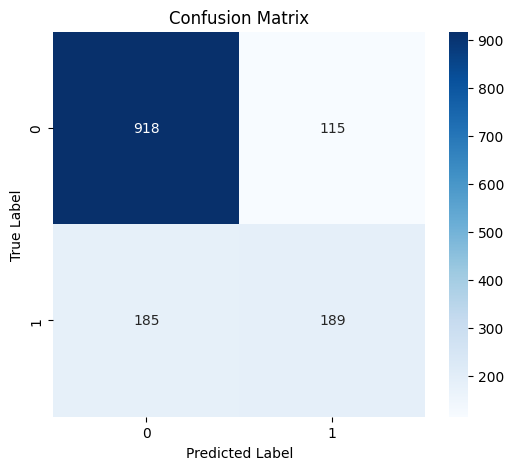

In [334]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)


plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=set(y_test), yticklabels=set(y_test))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

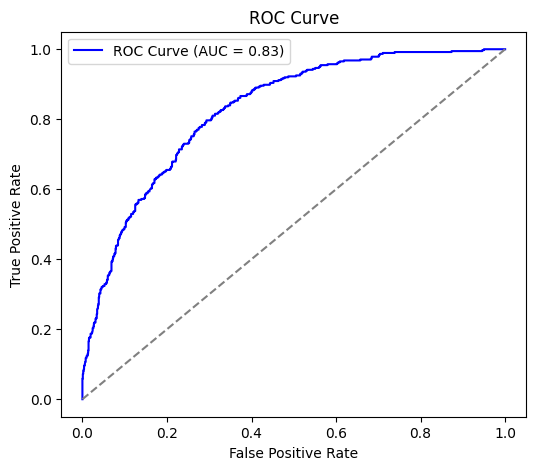

In [ ]:

from sklearn.metrics import roc_curve, auc
roc_model = HistGradientBoostingClassifier()
roc_model.fit(x_train, y_train)
y_prob = roc_model.predict_proba(x_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)


plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})", color='blue')
plt.plot([0,1], [0,1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

In [323]:
params_grid_hgb = {
    'max_iter': [50, 100, 200], 
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

histg_cls =  HistGradientBoostingClassifier()
grid_search_cls4 = GridSearchCV(histg_cls,params_grid_hgb, scoring='accuracy', cv=5, n_jobs=-1, verbose=3)
grid_search_cls4.fit(x_train, y_train)

print("\nbest parameter is ", grid_search_cls4.best_params_)
print("best accuracy is ", grid_search_cls4.best_score_)


Fitting 5 folds for each of 36 candidates, totalling 180 fits

best parameter is  {'learning_rate': 0.1, 'max_depth': 7, 'max_iter': 50}
best accuracy is  0.8051555555555556


In [ ]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
from skopt import BayesSearchCV
from skopt.space import Real, Integer
from scipy.stats import uniform, randint


param_dist = {
    'learning_rate': uniform(0.01, 0.3),
    'max_depth': randint(3, 10),
    'max_iter': randint(50, 300),
    'l2_regularization': uniform(0, 1)
}


histg_cls = HistGradientBoostingClassifier()


random_search = RandomizedSearchCV(histg_cls, param_distributions=param_dist,
                                   n_iter=30, scoring='accuracy', cv=5, n_jobs=-1, verbose=2, random_state=42)
random_search.fit(x_train, y_train)

print("\n🔍 Random Search Best Parameters:", random_search.best_params_)
print("🎯 Random Search Best Accuracy:", random_search.best_score_)


best_params = random_search.best_params_

param_space = {
    'learning_rate': Real(max(0.01, best_params['learning_rate'] * 0.5), min(0.3, best_params['learning_rate'] * 1.5), prior='log-uniform'),
    'max_depth': Integer(max(3, best_params['max_depth'] - 2), min(10, best_params['max_depth'] + 2)),
    'max_iter': Integer(max(50, best_params['max_iter'] - 50), min(300, best_params['max_iter'] + 50)),
    'l2_regularization': Real(max(0, best_params['l2_regularization'] * 0.5), min(1, best_params['l2_regularization'] * 1.5))
}


bayes_search = BayesSearchCV(histg_cls, param_space, n_iter=30, scoring='accuracy', cv=5, n_jobs=-1, verbose=2, random_state=42)
bayes_search.fit(x_train, y_train)

print("\n🚀 Final Bayesian Optimization Best Parameters:", bayes_search.best_params_)
print("🏆 Final Best Accuracy:", bayes_search.best_score_)


Fitting 5 folds for each of 30 candidates, totalling 150 fits

🔍 Random Search Best Parameters: {'l2_regularization': 0.7080725777960455, 'learning_rate': 0.016175348288740735, 'max_depth': 4, 'max_iter': 137}
🎯 Random Search Best Accuracy: 0.8046222222222223
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 ca

In [337]:
final_model = HistGradientBoostingClassifier(learning_rate= 0.1, max_depth= 7, max_iter= 50)
final_model.fit(x,y)


import joblib
joblib.dump(final_model, "hist_cls.pkl")
joblib.dump(encoder, "one_hot.pkl")

['one_hot.pkl']